# 2_Transform_data

### Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Import user defined libraries
import sys
sys.path.append("../src")
from functions import PhaNNS_thresholds, phageRBP_thresholds, NN_thresholds, random_concatenation

## 1. Load clean data

In [42]:
CLEAN_PATH = os.path.join('..', 'data', 'interim', 'clean')

if not os.path.exists(CLEAN_PATH):
    raise Exception('Clean data path does not exist. Did you run the notebook 01_clean_data.ipynb?')

# Import pickle clean data
receptors = pd.read_pickle(os.path.join(CLEAN_PATH, '1_receptors.pkl'))
protein_NN = pd.read_pickle(os.path.join(CLEAN_PATH, '1_proteins.pkl'))
basel_proteome = pd.read_pickle(os.path.join(CLEAN_PATH, '1_basel_proteome.pkl'))
k12_proteome = pd.read_pickle(os.path.join(CLEAN_PATH, '1_k12_proteome.pkl'))


In [43]:
# Display all dataframes
print('Receptors:')
display(receptors.head())
print('Protein NN:')
display(protein_NN.head())
print('Basel proteome:')
display(basel_proteome.head())
print('K12 proteome:')
display(k12_proteome.head())

Receptors:


,bas,genus,phage,morphotype,closest_relative,primary_receptor,terminal_receptor,receptor
0,Bas01,Rtpvirus,Escherichia phage AugustePiccard,siphovirus,RTP (AM156909.1),LPS / O-antigen?,LptD,n.a.
1,Bas02,Guelphvirus,Escherichia phage JeanPiccard,siphovirus,CEB_EC3a (NC_047812.1),LPS / O-antigen?,LptD,n.a.
2,Bas03,Guelphvirus,Escherichia phage JulesPiccard,siphovirus,CEB_EC3a (NC_047812.1),LPS / O-antigen?,FhuA,n.a.
3,Bas04,Warwickvirus,Escherichia phage FritzSarasin,siphovirus,tonnikala (NC_049817.1),LPS / O-antigen?,BtuB,n.a.
4,Bas05,Warwickvirus,Escherichia phage PeterMerian,siphovirus,XY3 (MN781674.1),LPS / O-antigen?,FhuA,n.a.


Protein NN:


,seqID,major_capsid,minor_capsid,baseplate,major_tail,minor_tail,portal,tail_fiber,tail_shaft,collar,HTJ,other,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_label,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.22,0.84,0.18,0.21,0.34,0.85,0.49,0.24,0.46,0.38,5.79,0.98,0,2.403247e-05,other,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00,1.00,0,3.570606e-08,other,0
2,lcl|MZ501051.1_prot_QXV76134.1_3,0.35,1.01,0.71,0.26,1.30,0.97,0.68,0.25,0.24,0.73,3.51,0.97,0,1.817806e-06,other,0
3,lcl|MZ501051.1_prot_QXV76135.1_4,0.01,0.23,0.02,0.01,0.03,0.10,0.09,0.01,0.16,0.03,9.32,1.00,0,1.184212e-05,other,0
4,lcl|MZ501051.1_prot_QXV76136.1_5,0.05,0.07,0.06,0.05,0.13,0.09,0.03,0.07,0.08,0.07,9.28,1.00,0,8.151848e-05,other,0


Basel proteome:


,seqID_phage,locus_tag,protein,protein_id,location,gbkey,sequence,gene,db_xref,frame,partial,exception,bas
0,lcl|MZ501051.1_prot_QXV76132.1_1,bas01_0001,terminase small subunit,QXV76132.1,1..507,CDS,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...,NaN,NaN,NaN,NaN,NaN,Bas01
1,lcl|MZ501051.1_prot_QXV76133.1_2,bas01_0002,hypothetical protein,QXV76133.1,526..621,CDS,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI,NaN,NaN,NaN,NaN,NaN,Bas01
2,lcl|MZ501051.1_prot_QXV76134.1_3,bas01_0003,terminase large subunit,QXV76134.1,609..2177,CDS,MANLIWEEMTSQEKLAVKAISEHSFEGFLRCWFSITQGERYIPNWH...,NaN,NaN,NaN,NaN,NaN,Bas01
3,lcl|MZ501051.1_prot_QXV76135.1_4,bas01_0004,putative homing endonuclease,QXV76135.1,2321..2716,CDS,MVAGSLSGNGYLHIRIGDRRVKNHLIIWEMHNGRIPEGMEIDHINH...,NaN,NaN,NaN,NaN,NaN,Bas01
4,lcl|MZ501051.1_prot_QXV76136.1_5,bas01_0005,hypothetical protein,QXV76136.1,2788..3168,CDS,MTKKSKAVYLGNTEGEYYGFTVGNEYDVHNYETEDNFIGTFGDDGG...,NaN,NaN,NaN,NaN,NaN,Bas01


K12 proteome:


,seqID_k12,name,OS,OX,GN,PE,SV,sequence
0,sp|A5A616|MGTS_ECOLI,Small protein MgtS,Escherichia coli (strain K12),83333,mgtS,1,1,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD
1,sp|O32583|THIS_ECOLI,Sulfur carrier protein ThiS,Escherichia coli (strain K12),83333,thiS,1,1,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...
2,sp|P00350|6PGD_ECOLI,"6-phosphogluconate dehydrogenase, decarboxylat...",Escherichia coli (strain K12),83333,gnd,1,2,MSKQQIGVVGMAVMGRNLALNIESRGYTVSIFNRSREKTEEVIAEN...
3,sp|P00363|FRDA_ECOLI,Fumarate reductase flavoprotein subunit,Escherichia coli (strain K12),83333,frdA,1,3,MQTFQADLAIVGAGGAGLRAAIAAAQANPNAKIALISKVYPMRSHT...
4,sp|P00370|DHE4_ECOLI,NADP-specific glutamate dehydrogenase,Escherichia coli (strain K12),83333,gdhA,1,1,MDQTYSLESFLNHVQKRDPNQTEFAQAVREVMTTLWPFLEQNPKYR...


## 2. Keep only important columns and rename

### 2.1 Protein receptors
Some of basel receptors are terminal (aka secondary) and some are primary. In both columns there are both LPS and proteins. We only care about proteins, so it might be a good idea to add a column 'receptor_protein' which selects the proteic one from the two. Also, the 'receptor' column has no proteins, so it might be useless for further analysis. \
We will keep only the values which find a match in the k12 gene set.\
NB: some values have a question mark. Since we are aiming fro an as-strict-as-possible labelling, these values are not included

In [44]:
# Get a set of the elements in a df
GN_set = set(k12_proteome['GN'].str.lower().tolist())

# Create a subset that contains only the rows where either primary_receptor or terminal_receptor are in GN_set
receptors = receptors[(receptors['primary_receptor'].str.lower().isin(GN_set)) | (receptors['terminal_receptor'].str.lower().isin(GN_set))]
receptors['receptor_protein'] = np.where(receptors['primary_receptor'].str.lower().isin(GN_set), receptors['primary_receptor'], 
                                      np.where(receptors['terminal_receptor'].str.lower().isin(GN_set), receptors['terminal_receptor'], np.nan))

# keep only useful columns
keep_columns = ['bas', 'phage', 'receptor_protein']
receptors = receptors[keep_columns]

In [45]:
display(receptors.head(2))
display(receptors.shape)

,bas,phage,receptor_protein
0,Bas01,Escherichia phage AugustePiccard,LptD
1,Bas02,Escherichia phage JeanPiccard,LptD


(50, 3)

The number of samples was reduced from 78 to 50

### 2.2 Protein NN
Of the PhaNN classification we will only care about tail_fiber and the confidence score. The rest can be dropped. \
Also, we care only about the binary classification of the ESM-based model

In [46]:
# Rename seqID to seqID_phage
protein_NN = protein_NN.rename(columns={'seqID': 'seqID_phage'})

# Keep only useful columns
keep_columns = ['seqID_phage', 'tail_fiber', 'confidence', 'PhageRBPdetect_prediction', 'PhageRBPdetect_score', 'ESM_based_fiber_prediction']
protein_NN = protein_NN[keep_columns]

In [47]:
display(protein_NN.head(2))
display(protein_NN.shape)

,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.49,0.98,0,2.403247e-05,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,1.00,0,3.570606e-08,0


(35416, 6)

### 2.3 Basel proteome

In [48]:
# Rename sequence to sequence_phage
basel_proteome = basel_proteome.rename(columns={'sequence': 'sequence_phage'})

# Keep only useful columns
keep_columns = ['bas', 'seqID_phage', 'sequence_phage']
basel_proteome = basel_proteome[keep_columns]

In [49]:
display(basel_proteome.head(2))
display(basel_proteome.shape)

,bas,seqID_phage,sequence_phage
0,Bas01,lcl|MZ501051.1_prot_QXV76132.1_1,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...
1,Bas01,lcl|MZ501051.1_prot_QXV76133.1_2,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI


(35416, 3)

### 2.4 k12 proteome

In [50]:
# List columns to keep and columns to rename
keep_columns = ['seqID_k12', 'sequence', 'GN']
change_names = {'sequence': 'sequence_k12',
                'GN': 'GN_k12'}

# Subset receptors_k12 and rename columns
k12_proteome = k12_proteome[keep_columns]
k12_proteome.rename(columns=change_names, inplace=True)

del keep_columns, change_names

In [51]:
display(k12_proteome.head(2))
display(k12_proteome.shape)

,seqID_k12,sequence_k12,GN_k12
0,sp|A5A616|MGTS_ECOLI,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD,mgtS
1,sp|O32583|THIS_ECOLI,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...,thiS


(4403, 3)

## 3. Merge receptors and k12_proteome

### 3.1 k12 genes unicity

First of all, let's check for the unicity of the gene names in k12 proteome

In [52]:
# Count occurences in k12_proteome of each GN
GN_count = k12_proteome['GN_k12'].str.lower().value_counts().to_frame()

# Print count of genes with a count of 1 and different than 1
print(f'Number of genes with a count of 1: {len(GN_count.loc[GN_count["count"] == 1])}')
print(f'Number of genes with a count different than 1: {len(GN_count.loc[GN_count["count"] != 1])}')

Number of genes with a count of 1: 4403
Number of genes with a count different than 1: 0


We can confirm that there are no duplicates among the k12 genes

### 3.2 Match receptor and sequence
Let's match each phage in the receptors dataframe with the sequence of the associated receptor, contained in k12_proteome.\
We expect that many entries from receptors could match to the same gene in k12_proteome, and not viceversa. \
We validate this using validate='many_to_one' during the merge, which would raise an error otherwise.

In [53]:
# Add a lower case column of receptor_protein as common identifier between receptors and k12_proteome
receptors['receptor_protein_lower'] = receptors['receptor_protein'].str.lower()
k12_proteome['GN_lower'] = k12_proteome['GN_k12'].str.lower()

# Merge datasets
receptors_k12 = receptors.merge(k12_proteome, how='inner', left_on='receptor_protein_lower', right_on='GN_lower', suffixes=('_phage', '_k12'), validate='many_to_one')

# Drop GN_lower and receptor_protein_lower and order by bas
receptors_k12.drop(columns=['GN_lower', 'receptor_protein_lower'], inplace=True)
receptors_k12.sort_values(by=['bas'], inplace=True)

# Drop GN_k12 and GN_lower in k12_proteome
k12_proteome.drop(columns=['GN_k12', 'GN_lower'], inplace=True)

In [54]:
display(receptors_k12.head())
display(receptors_k12.shape)

,bas,phage,receptor_protein,seqID_k12,sequence_k12,GN_k12
0,Bas01,Escherichia phage AugustePiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
1,Bas02,Escherichia phage JeanPiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
7,Bas03,Escherichia phage JulesPiccard,FhuA,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,fhuA
17,Bas04,Escherichia phage FritzSarasin,BtuB,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,btuB
8,Bas05,Escherichia phage PeterMerian,FhuA,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,fhuA


(50, 6)

Let's store a dict of the k12 proteins which are receptors involved in any interaction with the phages and the other way around

In [55]:
# Store seqID_k12 unique values k12_set['receptors'] the seqID_k12 of k12_proteome which are not in receptors_k12 in k12_set['others']
k12_set = {'receptors': set(receptors_k12['seqID_k12'].tolist()),
           'others': set(k12_proteome['seqID_k12'].tolist()) - set(receptors_k12['seqID_k12'].tolist())}

In [56]:
# Print the number of elements in each set
print('Number of receptors: {}'.format(len(k12_set['receptors'])))
print('Number of others: {}'.format(len(k12_set['others'])))

Number of receptors: 10
Number of others: 4393


## 4. Define RBPs (receptor-binding proteins)
Defining which exact viral proteins are RBPs is not trivial.\
Defining which of them interacts with which host protein during the infection is even more difficult.\
The 'protein' tag in basel_proteome could surely be useful, since the organisms are well studied and the labels should in general be trustworthy.\
However, the tags can assume very different forms, and it is not clear how to match them with the k12_proteome.\
It is not easy to systematically determine which are tail fibers, which are components of other part of the tail, which are actually putative proteins and so on. \
Obtaining an accurate labeling of phage-host protein pairs is essentially a whole bioinformatics project on its own.

For this reason, we will use the predictions of the various neural networks for the labeling of RBPs. \
These models have shown to be quite accurate, but we must remember that the final predictions obtained in this project will be biased by the performances of the classifiers.

### 4.1 Explore PhaNNS distribution
PhaNNS assigns a score to each kind of labeling from 0 to 10, and a confidence score on the prediction from 0 to 1. \
The labeling scores are in the first 11 columns of protein_NN, the confidence is the 12th. \
We will consider as only probable RBPs the ones classified as tail fiber with a good confidence score. 

First of all, let's analize the distributions of the tail fiber labels and of the confidence score. \
We will subsequently define some cutoff thresholds to determine the amounts of proteins to consider as RBPs.

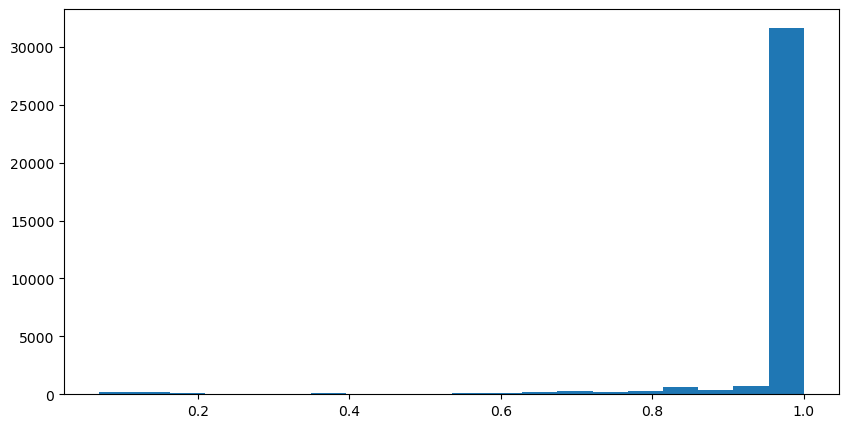

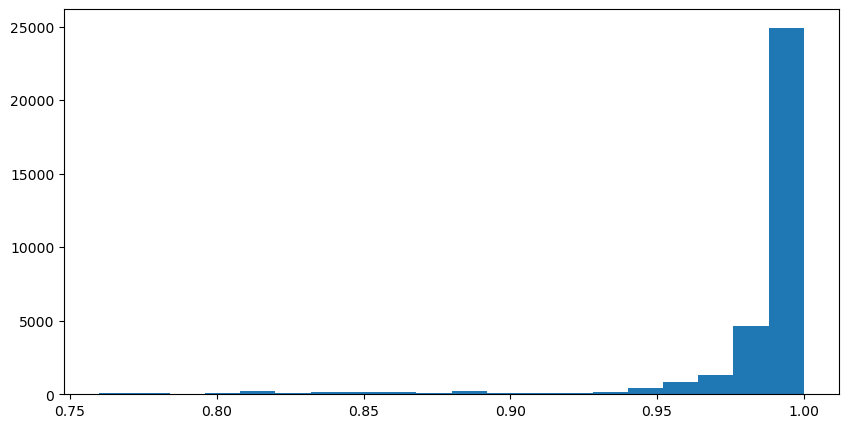

In [57]:
# Plot distribution of confidence scores
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN['confidence'], bins=20)
plt.show()

# Plot distribution of confidence scores above 0.75
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN[protein_NN['confidence'] > 0.75]['confidence'], bins=20)
plt.show()

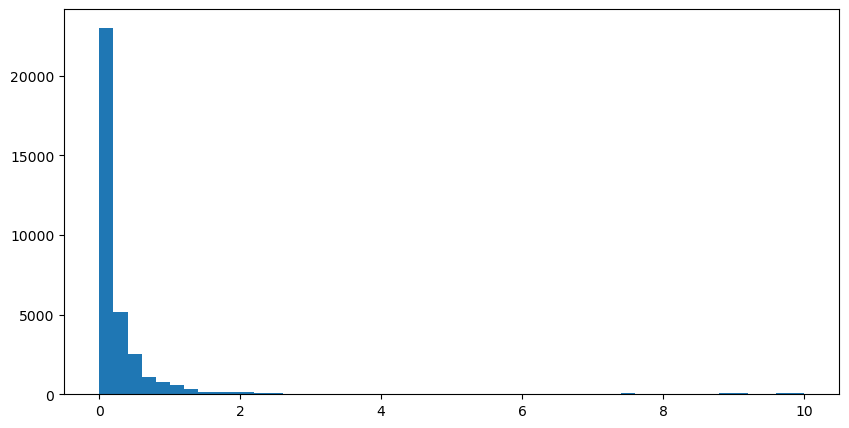

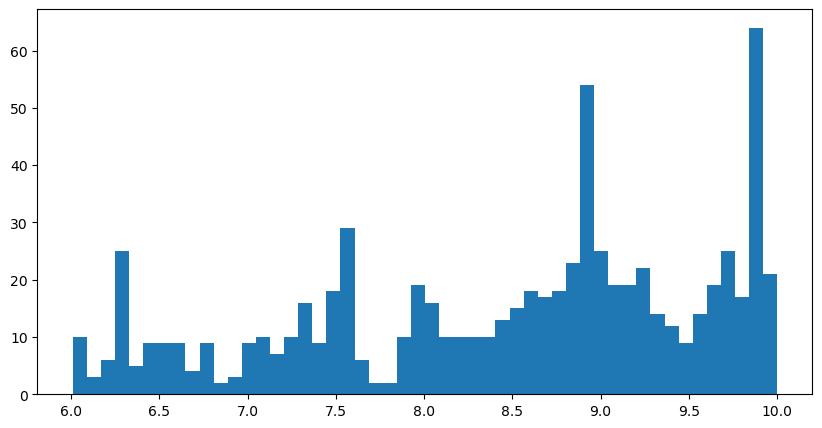

In [58]:
# Plot distribution of tail_fiber with bins of 0.5
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN['tail_fiber'], bins=50)
plt.show()

# Plot distribution of tail_fiber with bins of 0.5 above 6
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN[protein_NN['tail_fiber'] > 6]['tail_fiber'], bins=50)
plt.show()

Let's check the percentage of proteins which would be deemed as RBPs in function of various tail_fiber and confidence thresholds

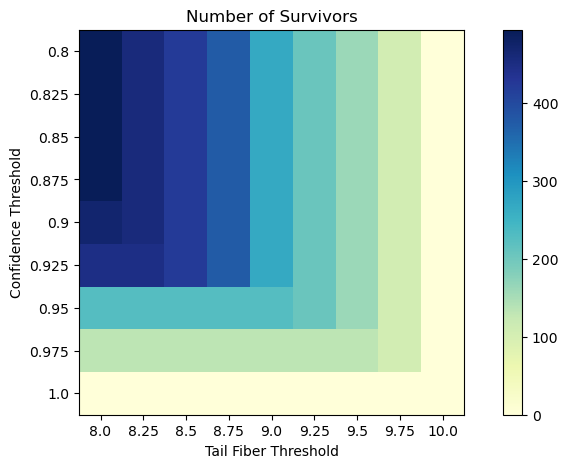

,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00
0.800,494,457,422,373,267,206,161,105,0
0.825,494,457,422,373,267,206,161,105,0
0.850,494,457,422,373,267,206,161,105,0
0.875,494,457,422,373,267,206,161,105,0
0.900,470,457,422,373,267,206,161,105,0
0.925,446,446,422,373,267,206,161,105,0
0.950,226,226,226,226,226,206,161,105,0
0.975,133,133,133,133,133,133,133,105,0
1.000,0,0,0,0,0,0,0,0,0


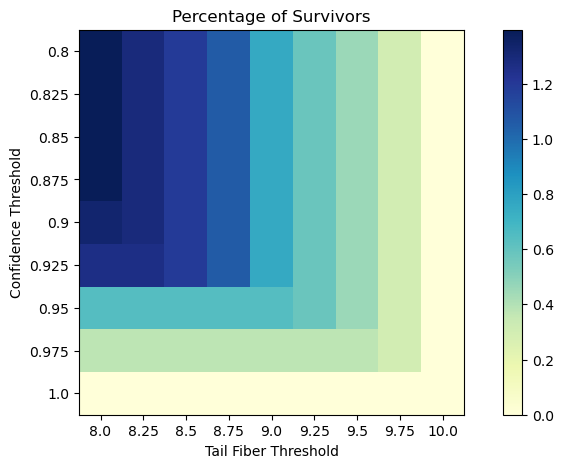

,8.00,8.25,8.50,8.75,9.00,9.25,9.50,9.75,10.00
0.800,1.394850,1.290377,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.825,1.394850,1.290377,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.850,1.394850,1.290377,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.875,1.394850,1.290377,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.900,1.327084,1.290377,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.925,1.259318,1.259318,1.191552,1.053196,0.753897,0.581658,0.454597,0.296476,0.0
0.950,0.638130,0.638130,0.638130,0.638130,0.638130,0.581658,0.454597,0.296476,0.0
0.975,0.375536,0.375536,0.375536,0.375536,0.375536,0.375536,0.375536,0.296476,0.0
1.000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [59]:
# Define the thresholds and round up
conf_thresholds = np.around(np.arange(0.8, 1.025, 0.025), decimals=3)  # Without rounding the plot looks ugly
tail_fiber_thresholds = np.around(np.arange(8, 10.25, 0.25), decimals=3)

# Plot the results
PhaNNS_thresholds(conf_thresholds, tail_fiber_thresholds, percentage=False, protein_NN=protein_NN)  # Number
PhaNNS_thresholds(conf_thresholds, tail_fiber_thresholds, percentage=True, protein_NN=protein_NN)  # Percentage

With the most restrictive considered thresholds we get 105 proteins - 0.3 % of the total - labeled as RBPs.\
The viruses in the library are 78, and we actually have fewer after matching their host receptors. It would be nice to consider in most of the cases to have only one RBP per virus.\
\
Let's use a finer resolution to study that part of the distribution, we might manage to be more restrictive

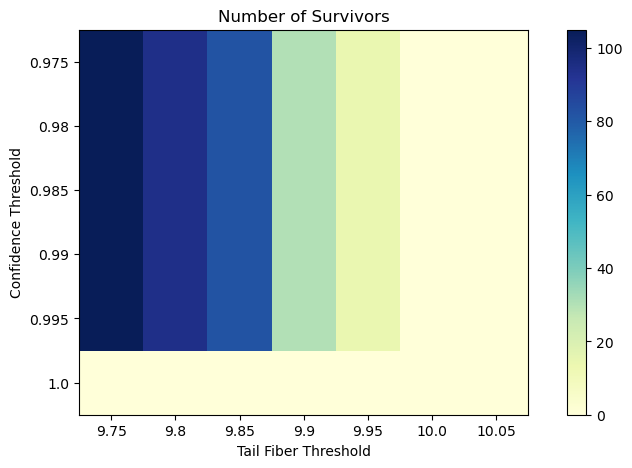

,9.75,9.80,9.85,9.90,9.95,10.00,10.05
0.975,105,94,82,30,14,0,0
0.980,105,94,82,30,14,0,0
0.985,105,94,82,30,14,0,0
0.990,105,94,82,30,14,0,0
0.995,105,94,82,30,14,0,0
1.000,0,0,0,0,0,0,0


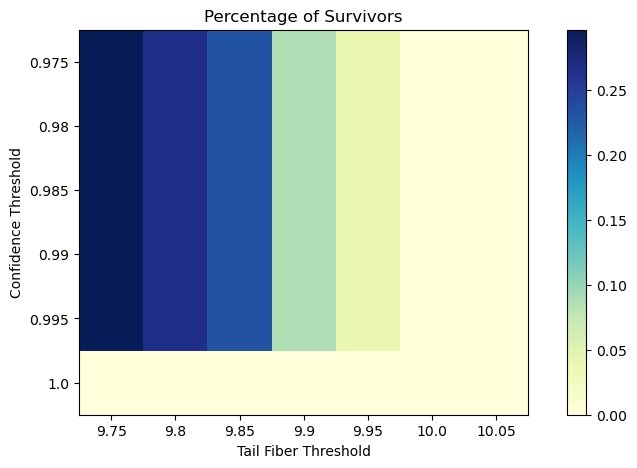

,9.75,9.80,9.85,9.90,9.95,10.00,10.05
0.975,0.296476,0.265417,0.231534,0.084707,0.03953,0.0,0.0
0.980,0.296476,0.265417,0.231534,0.084707,0.03953,0.0,0.0
0.985,0.296476,0.265417,0.231534,0.084707,0.03953,0.0,0.0
0.990,0.296476,0.265417,0.231534,0.084707,0.03953,0.0,0.0
0.995,0.296476,0.265417,0.231534,0.084707,0.03953,0.0,0.0
1.000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0,0.0


In [60]:
# Define the thresholds and round up to the third digit
conf_thresholds = np.around(np.arange(0.975, 1.005, 0.005), decimals=3)
tail_fiber_thresholds = np.around(np.arange(9.75, 10.05, 0.05), decimals=2)

# Plot the results
PhaNNS_thresholds(conf_thresholds, tail_fiber_thresholds, percentage=False, protein_NN=protein_NN)  # Number
PhaNNS_thresholds(conf_thresholds, tail_fiber_thresholds, percentage=True, protein_NN=protein_NN)  # Percentage

The chosen thresholds are:

    - tail_fiber: 9.85
    - confidence: 0.995

#### Survivor proteins: 82 (0.23 %)

### 4.2 Explore phageRBPdetect distribution
PhageRBPdetect has binary prediction on RBP labeling and a higher confidence when its score approaches 1. \
Let's explore score and labels distributions

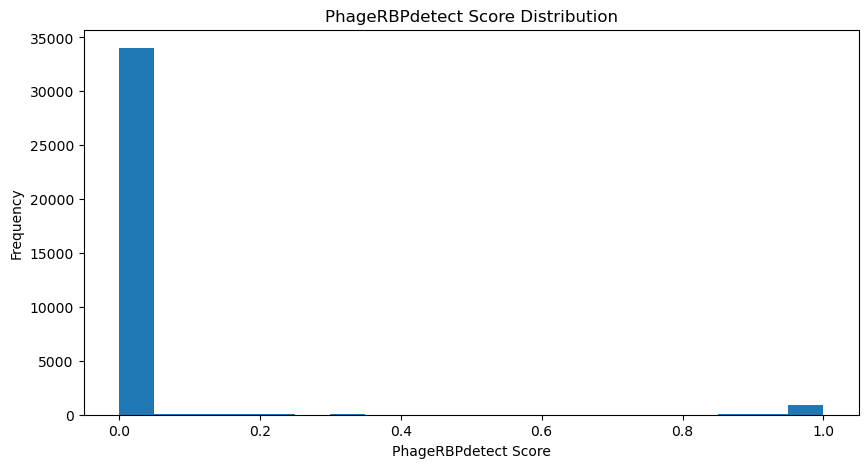

PhageRBPdetect_prediction
0    34330
1     1086
Name: count, dtype: int64

PhageRBPdetect_prediction
0    96.933589
1     3.066411
Name: proportion, dtype: float64

In [61]:
# Plot distribution of phageRBDdetect_score
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN['PhageRBPdetect_score'], bins=20)

# Add title and labels
ax.set_title('PhageRBPdetect Score Distribution')
ax.set_xlabel('PhageRBPdetect Score')
ax.set_ylabel('Frequency')

plt.show()

# Count 0, 1 and nan occurencies in phageRBDdetect_prediction and show percentages 
display(protein_NN['PhageRBPdetect_prediction'].value_counts(dropna=False))
display(protein_NN['PhageRBPdetect_prediction'].value_counts(normalize=True, dropna=False) * 100)


Let's zoom the high confidence scores

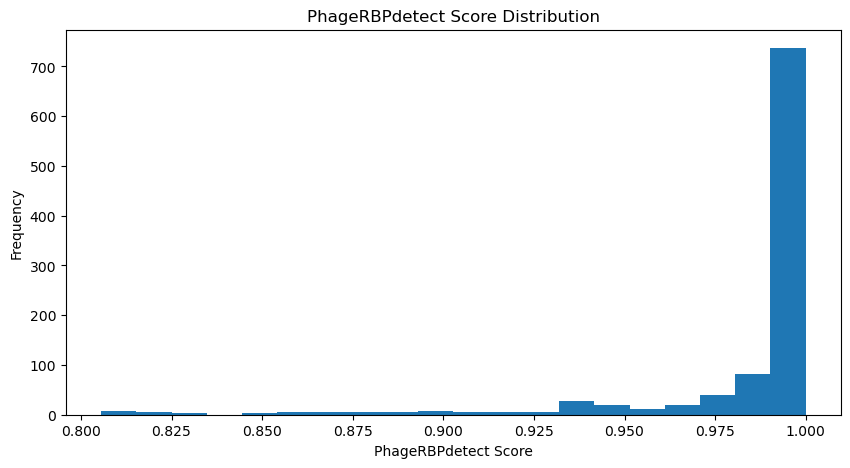

In [62]:
# Zoom scores above 0.8
fig, ax = plt.subplots(figsize=(10, 5))
ax.hist(protein_NN[protein_NN['PhageRBPdetect_score'] > 0.8]['PhageRBPdetect_score'], bins=20)

# Add title and labels
ax.set_title('PhageRBPdetect Score Distribution')
ax.set_xlabel('PhageRBPdetect Score')
ax.set_ylabel('Frequency')

plt.show()

With a high confidence threshold we could still keep more than 700 proteins. \
But we care about the ones predicted as RBPs. Let's see how many of those survive various thresholds

In [63]:
# Define the thresholds and round up to the third digit
conf_thresholds = np.around(np.arange(0.975, 1.005, 0.005), decimals=3)

# Plot the results
phageRBP_thresholds(conf_thresholds, protein_NN=protein_NN)

,survivors,percentage
0.975,847,2.391574
0.980,820,2.315338
0.985,790,2.230630
0.990,742,2.095098
0.995,633,1.787328
1.000,0,0.000000


With the most strict filter we still have 633 positive predictions - 1.79 % of total. \
Let's explore more in detail to see if we can reduce this number

In [64]:
# Define the thresholds and round up to the third digit
conf_thresholds = np.around(np.arange(0.999, 1.0001, 0.0001), decimals=4)

# Plot the results
phageRBP_thresholds(conf_thresholds, protein_NN=protein_NN)

,survivors,percentage
0.9990,396,1.118139
0.9991,378,1.067314
0.9992,363,1.024960
0.9993,336,0.948724
0.9994,318,0.897899
0.9995,290,0.818839
0.9996,261,0.736955
0.9997,222,0.626835
0.9998,168,0.474362
0.9999,96,0.271064


With a stricter threshold we have a number of survivors closer to the PhaNNS'
#### confidence > 0.9999
#### survivors = 96

### 4.3 Explore ESM-based distribution
ESM_based_fiber_prediction is a binary attribute which states if the ESM-based classifier labeled the protein as tail fiber. \
We are not provided with any confidence score. Let's check anyway how many predictions we have. \
We'll later interesect with the sets of the previous predictors.

In [65]:
# Count 0, 1 and nan occurencies in ESM_based_fiber_prediction and show percentages 
display(protein_NN['ESM_based_fiber_prediction'].value_counts(dropna=False))
display(protein_NN['ESM_based_fiber_prediction'].value_counts(normalize=True, dropna=False) * 100)


ESM_based_fiber_prediction
0    34622
1      794
Name: count, dtype: int64

ESM_based_fiber_prediction
0    97.758075
1     2.241925
Name: proportion, dtype: float64

ESM-based predicts 794 proteins - 2.24 % of total - as tail fibers. \
#### survivors: 794

### 4.4 Intersect survivors
Let's procede now to apply all the thresholds at the same time. We will hopefully have a number of RBPs close to the number of viruses in the library. \
Later on we will check the number of proteins for each virus. 

In [66]:
# Define thresholds
thresholds = {'phanns_tf': 9.85,
              'phanns_conf': 0.995,
              'phagerbp': 0.9999}

# Subset protein_NN to relevant columns and filter for thresholds
tail_fibers = NN_thresholds(thresholds, protein_NN=protein_NN)

In [67]:
# Display survivors
print(f'Number of survivors: {len(tail_fibers)}')
display(tail_fibers)

Number of survivors: 30


,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
9322,lcl|MZ501105.1_prot_QXV84576.1_20,9.98,1.0,1,0.999947,1
9504,lcl|MZ501109.1_prot_QXV85262.1_22,9.98,1.0,1,0.999981,1
9855,lcl|MZ501075.1_prot_QXV80203.1_22,10.00,1.0,1,0.999903,1
10028,lcl|MZ501074.1_prot_QXV80034.1_23,9.95,1.0,1,0.999990,1
10477,lcl|CP000917.1_prot_ACB97589.1_146,9.99,1.0,1,0.999946,1
10755,lcl|KR422353.1_prot_AKO61493.1_92,9.96,1.0,1,0.999922,1
11212,lcl|MK393882.1_prot_QAU04693.1_115,9.98,1.0,1,0.999944,1
12044,lcl|MH370380.1_prot_AXC41939.1_20,9.99,1.0,1,0.999987,1
12312,lcl|MK972708.1_prot_QEI25164.1_125,9.99,1.0,1,0.999994,1
12356,lcl|MK972717.1_prot_QEI25846.1_20,9.98,1.0,1,0.999960,1


With the previously proposed thresholds, the number of survivors is as low as 30. \
Let's try to relax the thresholds a bit to see if we can get a higher number of survivors. \
In particular, let's reduce the PhageRBPDdetect threshold, being it the most strict one.

In [68]:
# Define thresholds
thresholds = {'phanns_tf': 9.75,
              'phanns_conf': 0.975,
              'phagerbp': 0.995}

# Subset protein_NN to relevant columns and filter for thresholds
tail_fibers = NN_thresholds(thresholds, protein_NN=protein_NN)

Let's store the list of the proteins labeled as tail_fibers

In [69]:
# Store tail_fibers unique values of seqID in phage_set['RBP'] and the seqID of basel proteome which are not in tail_fibers in phage_set['others']
phage_set = {'tail_fibers': set(tail_fibers['seqID_phage'].tolist()),
             'others': set(basel_proteome['seqID_phage'].tolist()) - set(tail_fibers['seqID_phage'].tolist())}
             
# Print the number of elements in each set
print('Number of tail fibers: {}'.format(len(phage_set['tail_fibers'])))
print('Number of others: {}'.format(len(phage_set['others'])))

Number of tail fibers: 94
Number of others: 35322


### Final thresholds

    - PhaNNS tail_fiber: 9.85
    - PhaNNS confidence: 0.995
    - PhageRBPdetect: 0.999

#### survivors: 75

## 5. Obtain protein pairs
Let's now obtain a the set of interacting protein pairs. \
We will then need to obtain a set of negative samples. The model input set will consist of this two sets together.



In [70]:
# Display first 2 rows of all dataframes (with title)
print('Receptors k12:')
display(receptors_k12.head(2))
print('Protein NN:')
display(protein_NN.head(2))
print('Basel proteome:')
display(basel_proteome.head(2))
print('K12 proteome:')
display(k12_proteome.head(2))
print('Tail fibers:')
display(tail_fibers.head(2))

Receptors k12:


,bas,phage,receptor_protein,seqID_k12,sequence_k12,GN_k12
0,Bas01,Escherichia phage AugustePiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD
1,Bas02,Escherichia phage JeanPiccard,LptD,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,lptD


Protein NN:


,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
0,lcl|MZ501051.1_prot_QXV76132.1_1,0.49,0.98,0,2.403247e-05,0
1,lcl|MZ501051.1_prot_QXV76133.1_2,0.00,1.00,0,3.570606e-08,0


Basel proteome:


,bas,seqID_phage,sequence_phage
0,Bas01,lcl|MZ501051.1_prot_QXV76132.1_1,MSKAALKMGEGNFKALYNKKYGDIAMVAINRKYTPEEVFDFAVRYF...
1,Bas01,lcl|MZ501051.1_prot_QXV76133.1_2,MKGFIKLFIWYYLLTSISLCVFMLVVKLWLI


K12 proteome:


,seqID_k12,sequence_k12
0,sp|A5A616|MGTS_ECOLI,MLGNMNVFMAVLGIILFSGFLAAYFSHKWDD
1,sp|O32583|THIS_ECOLI,MQILFNDQAMQCAAGQTVHELLEQLDQRQAGAALAINQQIVPREQW...


Tail fibers:


,seqID_phage,tail_fiber,confidence,PhageRBPdetect_prediction,PhageRBPdetect_score,ESM_based_fiber_prediction
26,lcl|MZ501051.1_prot_QXV76158.1_27,9.82,1.0,1,0.998499,1
100,lcl|MZ501080.1_prot_QXV80789.1_23,9.89,1.0,1,0.999607,1


Merge a subset of basel proteome composed of tail fibers with receptors_k12. \
We are keeping only the entries where we have the values from both datasets (inner merge).

This will be the positive set of samples.

In [71]:
# Left merge of basel_proteome where seqID_phage is in phage_set['tail_fibers'] and receptors_k12 based on bas
protein_pairs  = basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])].merge(receptors_k12, how='inner', on='bas')
protein_pairs.drop_duplicates(inplace=True)

# Reorder columns
model_df_columns = ['bas', 'seqID_phage', 'sequence_phage', 'seqID_k12', 'sequence_k12']
protein_pairs = protein_pairs[model_df_columns]

# Add a column 'pair' with value 1
protein_pairs['pair'] = 1

In [72]:
# display(protein_pairs.head(2))
display(protein_pairs)


,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair
0,Bas01,lcl|MZ501051.1_prot_QXV76158.1_27,MAQMIKTNMRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
1,Bas02,lcl|MZ501080.1_prot_QXV80789.1_23,MAQMIKTNVRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
2,Bas03,lcl|MZ501087.1_prot_QXV81855.1_28,MAQMIKTNMRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
3,Bas07,lcl|MZ501079.1_prot_QXV80698.1_23,MAENMITGSKGGSSKPYVPKEMEDNLISINKIKILLAVSDGECDPD...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
4,Bas08,lcl|MZ501059.1_prot_QXV77397.1_22,MIKNMITGSKGGSSKPHTPVEMEDNLISINRIRILLAVSDGEVDPD...,sp|P02930|TOLC_ECOLI,MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...,1
5,Bas13,lcl|MZ501092.1_prot_QXV82459.1_22,MIQKVISGSKGGSQKPHNPVEMEDNLISINKIKILLAVSDGEIDET...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
6,Bas29,lcl|MZ501105.1_prot_QXV84576.1_20,MALKTKIIVQQILNIDDTTTTASKYPKYTVVLGTSISSITASELIG...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1
7,Bas30,lcl|MZ501109.1_prot_QXV85262.1_22,MALKTKIIVQQILNIDDTTTTASKYPKYTVVLGTSISSITASELTG...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1
8,Bas32,lcl|MZ501075.1_prot_QXV80203.1_22,MAITTKIIVQQILNIDDTKATASKFPRYTVTLGNSISSITANELVS...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1
9,Bas33,lcl|MZ501074.1_prot_QXV80034.1_23,MAITKIILQQMVTMDQNSITASKYPKYTIVLGNTISSITAAELTSA...,sp|P06129|BTUB_ECOLI,MIKKASLLTACSVTAFSAWAQDTSPDTLVVTANRFEQPRSTVLAPT...,1


In [73]:
# Count the number of different seqID_phage in protein_pairs grouped by bas
bas_count = protein_pairs.groupby('bas')['seqID_phage'].nunique().to_frame()

# Print the number of bas with a count of 1 and different than 1
print(f'Number of bas with a count of 1: {len(bas_count.loc[bas_count["seqID_phage"] == 1])}')
print(f'Number of bas with a count different than 1: {len(bas_count.loc[bas_count["seqID_phage"] != 1])}')

# If any bas has a count different than 1 say it and display bas_count with a count different than 1
if len(bas_count.loc[bas_count["seqID_phage"] != 1]) > 0:
    print('The following bas have a count different than 1:')
    display(bas_count.loc[bas_count["seqID_phage"] != 1])


Number of bas with a count of 1: 23
Number of bas with a count different than 1: 0


## 6. Obtain negative samples
There are two kinds of negative samples we can obtain: 

    - Non-tail fiber with any other protein (other_neg_pairs)
    - Tail fibers with any protein that is not its receptor (tail_neg_pairs)

A big number of protein pairs can be obtained from all the possible combinations, so let's just take a number of random samples from the two sets of proteins.

### 6.1 Non-tail fiber with any other protein

In [74]:
# Concatenate side by side random entries from basel_proteome (others) and k12_proteome
other_neg_n_samples = 3000
other_neg_pairs = random_concatenation(basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['others'])], k12_proteome, n_entries=other_neg_n_samples)

# Add a column 'pair' with value 0
other_neg_pairs['pair'] = 0

In [75]:
display(other_neg_pairs.head(2))

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair
0,Psf1,lcl|KC710998.1_prot_AGI61443.1_60,MAKNVEPAVKACNFKKLYNKQYGDIAKMTKAHKYTPEQVFDLAVRY...,sp|P0AER3|GLTJ_ECOLI,MSIDWNWGIFLQQAPFGNTTYLGWIWSGFQVTIALSICAWIIAFLV...,0
1,Ecgd1,lcl|KU522583.1_prot_AMM43361.1_35,MNIKDVVAYVADEVKNHTSLLKVMVVVKNGIGQVNVQHVLSDTVYN...,sp|P04079|GUAA_ECOLI,MTENIHKHRILILDFGSQYTQLVARRVRELGVYCELWAWDVTEAQI...,0


### 6.2 Tail fibers with any protein that is not its receptor
We will define a set from `protein_pairs` with all the seqIDs of the RBP and respective receptor concated.
Then create a random 

In [76]:
# Concatenate side by side random entries from basel_proteome (tail_fibers) and k12_proteome
# Making sure that the resulting dataframe does not contain any of the real protein pairs
tail_fibers_neg_n_samples = 3000
tail_fibers_neg_pairs = random_concatenation(basel_proteome[basel_proteome['seqID_phage'].isin(phage_set['tail_fibers'])],
                                             k12_proteome, 
                                             n_entries=tail_fibers_neg_n_samples, 
                                             exclude_df=protein_pairs.drop(columns=['pair']))

# Add a column 'pair' with value 0
tail_fibers_neg_pairs['pair'] = 0

In [77]:
display(tail_fibers_neg_pairs)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair
0,Hos17,lcl|NC_047864.1_prot_YP_009792968.1_41,MANVIKTVLTYQLDGSNRDFNIPFEYLARKFVVVTLIGVDRKVLTI...,sp|P77700|YAHB_ECOLI,MNSIFTEENLLAFTTAARFGSFSKAAEELGLTTSAISYTIKRMETG...,0
1,Bas41,lcl|MZ501067.1_prot_QXV79069.1_80,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P64463|YDFZ_ECOLI,MTTYDRNRNAITTGSRVMVSGTGHTGKILSIDTEGLTAEQIRRGKT...,0
2,G9062,lcl|MK373779.1_prot_QBQ78029.1_247,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P33029|YEIQ_ECOLI,MNTIASVTLPHHVHAPRYDRQQLQSRIVHFGFGAFHRAHQALLTDR...,0
3,Agc,lcl|CP000917.1_prot_ACB97589.1_146,MALKTKIIVQQILNIDDTTTTASKYPKYTVVLGTSISSITASELTG...,sp|P76148|YNEG_ECOLI,MQSLDPLFARLSRSKFRSRFRLGMKERQYCLEKGAPVIEQHAADFV...,0
4,NaN,lcl|MH550421.1_prot_AXN58281.1_240,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P76170|YNFB_ECOLI,MKITLSKRIGLLAILLPCALALSTTVHAETNKLVIESGDSAQSRQH...,0
...,...,...,...,...,...,...
2995,Psf1,lcl|KC710998.1_prot_AGI61465.1_82,MAENMITGSKGGSSKPYVPKEMEDNLISINKIKILLAVSDGECDPD...,sp|P64624|YHEO_ECOLI,MSRSLLTNETSELDLLDQRPFDQTDFDILKSYEAVVDGLAMLIGSH...,0
2996,Pyps2t,lcl|MH809535.1_prot_AYJ74491.1_85,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P60546|KGUA_ECOLI,MAQGTLYIVSAPSGAGKSSLIQALLKTQPLYDTQVSVSHTTRQPRP...,0
2997,Ec3a,lcl|KY398841.1_prot_AQN32352.1_37,MIKTNMRLRDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKVKVL...,sp|P39355|YJHE_ECOLI,MLADELTIGPIRAVPMDITPKYVGIASGLMNAGSAVADIISPIAFG...,0
2998,NaN,lcl|LN881733.1_prot_CUL02550.1_30,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P0AD86|LPT_ECOLI,MKRISTTITTTITITTGNGAG,0


## 7. Merge positive and negative samples and save

In [78]:
# Concatenate the three dataframes
model_df = pd.concat([protein_pairs, other_neg_pairs, tail_fibers_neg_pairs], axis=0)

# Reset index
model_df.reset_index(drop=True, inplace=True)

In [79]:
display(model_df)

,bas,seqID_phage,sequence_phage,seqID_k12,sequence_k12,pair
0,Bas01,lcl|MZ501051.1_prot_QXV76158.1_27,MAQMIKTNMRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
1,Bas02,lcl|MZ501080.1_prot_QXV80789.1_23,MAQMIKTNVRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P31554|LPTD_ECOLI,MKKRIPTLLATMIATALYSQQGLAADLASQCMLGVPSYDRPLVQGD...,1
2,Bas03,lcl|MZ501087.1_prot_QXV81855.1_28,MAQMIKTNMRLCDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKV...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
3,Bas07,lcl|MZ501079.1_prot_QXV80698.1_23,MAENMITGSKGGSSKPYVPKEMEDNLISINKIKILLAVSDGECDPD...,sp|P06971|FHUA_ECOLI,MARSKTAQPKHSLRKIAVVVATAVSGMSVYAQAAVEPKEDTITVTA...,1
4,Bas08,lcl|MZ501059.1_prot_QXV77397.1_22,MIKNMITGSKGGSSKPHTPVEMEDNLISINRIRILLAVSDGEVDPD...,sp|P02930|TOLC_ECOLI,MKKLLPILIGLSLSGFSSLSQAENLMQVYQQARLSNPELRKSAADR...,1
...,...,...,...,...,...,...
6018,Psf1,lcl|KC710998.1_prot_AGI61465.1_82,MAENMITGSKGGSSKPYVPKEMEDNLISINKIKILLAVSDGECDPD...,sp|P64624|YHEO_ECOLI,MSRSLLTNETSELDLLDQRPFDQTDFDILKSYEAVVDGLAMLIGSH...,0
6019,Pyps2t,lcl|MH809535.1_prot_AYJ74491.1_85,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P60546|KGUA_ECOLI,MAQGTLYIVSAPSGAGKSSLIQALLKTQPLYDTQVSVSHTTRQPRP...,0
6020,Ec3a,lcl|KY398841.1_prot_AQN32352.1_37,MIKTNMRLRDMAEEIKIYGAKGGSQKQHQPVEQEDNLISLNKVKVL...,sp|P39355|YJHE_ECOLI,MLADELTIGPIRAVPMDITPKYVGIASGLMNAGSAVADIISPIAFG...,0
6021,NaN,lcl|LN881733.1_prot_CUL02550.1_30,MAEIKRKFRAEDGLDAGGDKIINVALADRTVGTDGVNVDYLIQENT...,sp|P0AD86|LPT_ECOLI,MKRISTTITTTITITTGNGAG,0


In [80]:
# Define saving path
OUT_PATH = os.path.join('..', 'data', 'interim')
if not os.path.exists(OUT_PATH):
    os.makedirs(OUT_PATH)

# Save model_df as pickle
model_df.to_pickle(os.path.join(OUT_PATH, '2_model_df.pkl'))